$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [2]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year = 12, s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt +sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [23]:
p = gbm(10, 3)

In [24]:
p.shape

(120, 3)

<Axes: >

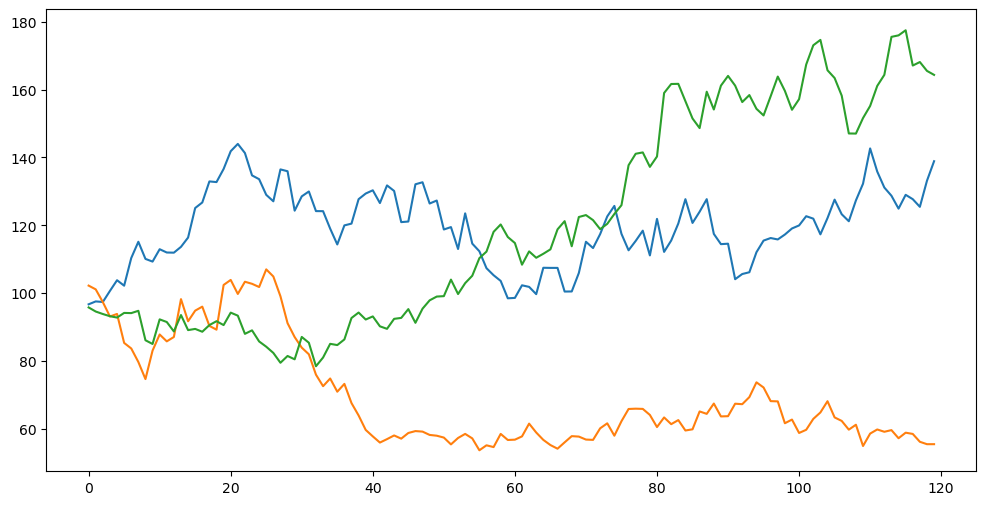

In [25]:
p.plot(figsize=(12,6), legend =False)

In [29]:
p = gbm(n_years=10, n_scenarios=1000)

In [41]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year = 12, s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt +sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year = 12, s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [32]:
%timeit gbm0(n_years=5,n_scenarios=1000)

1.82 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%timeit gbm1(n_years=5,n_scenarios=1000)

1.76 ms ± 82.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<Axes: >

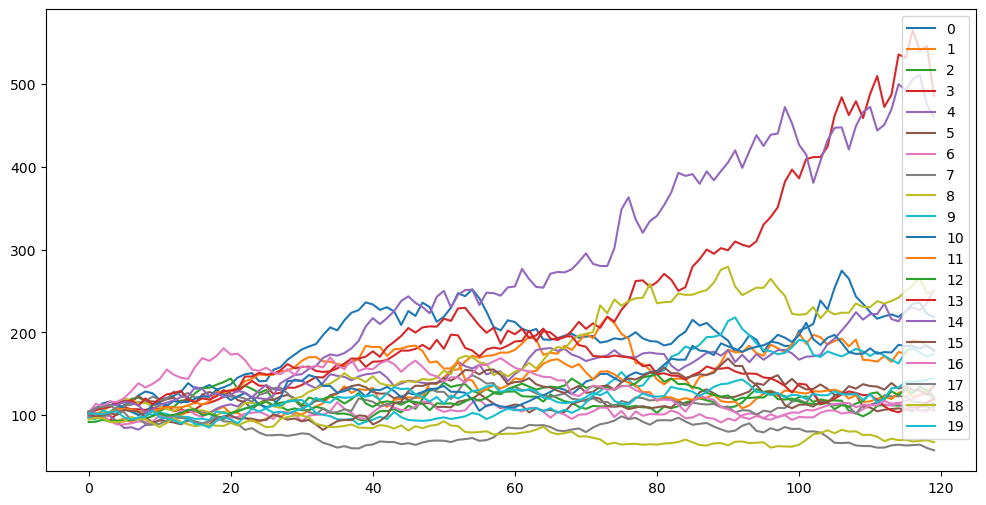

In [40]:
gbm0(n_years=10, n_scenarios=20).plot(legend="False", figsize=(12,6))

<Axes: >

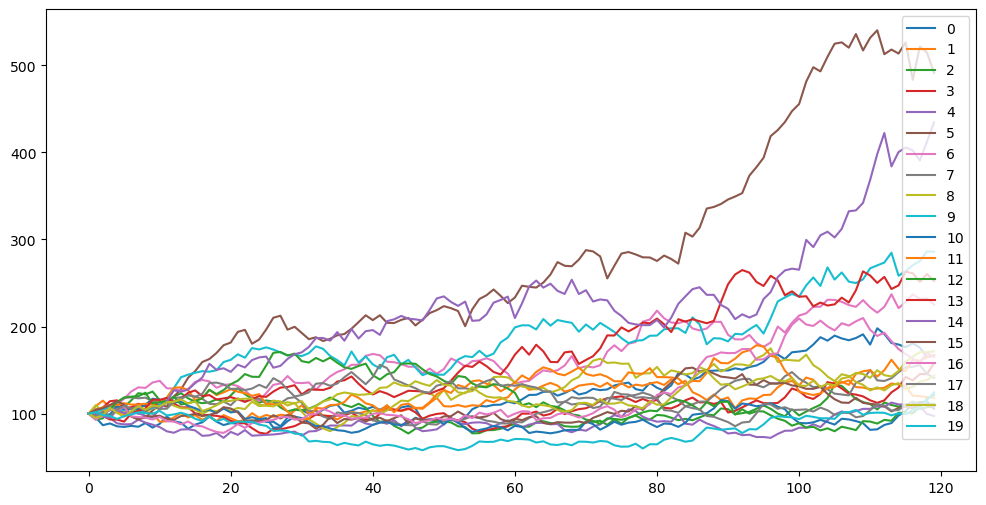

In [44]:
gbm1(n_years=10, n_scenarios=20).plot(legend="False", figsize=(12,6))

In [43]:
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year = 12, s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [48]:
gbm1(n_scenarios = 10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.028338,104.384016,104.370463,104.754493,95.485827,101.351945,94.470668,103.087289,96.087827,100.282167
2,107.377137,109.691374,100.823313,108.428076,87.090860,111.134020,96.037519,106.013828,89.951648,103.261199
3,104.788163,100.884167,106.255938,112.465574,88.943915,120.711171,94.061047,104.589311,92.929909,98.517369
4,107.676160,105.744178,103.994821,109.773840,89.211500,133.900881,96.925539,114.850414,91.510672,105.772266
